In [20]:
import pandas as pd
import numpy as np
from IPython.display import display

# Đường dẫn file
CSV_PATH = "abalone_data.csv"
df = pd.read_csv(CSV_PATH)

# a Kích thước và chiều
print("\n--- a. Kích thước & chiều dữ liệu ---")
print(f"Số hàng (mẫu): {df.shape[0]}")
print(f"Số cột (thuộc tính): {df.shape[1]}")

# b Kiểu dữ liệu
print("\n--- b. Kiểu dữ liệu của các thuộc tính ---")
display(df.dtypes.to_frame('Kiểu dữ liệu'))

# c Số lượng thực thể theo nhãn
print("\n--- c. Phân bố giá trị nhãn 'Sex' ---")
sex_counts = df['Sex'].value_counts().sort_index()
display(sex_counts.to_frame('Số lượng'))

print("\n--- c. Phân bố giá trị nhãn 'Rings' ---")
rings_counts = df['Rings'].value_counts().sort_index()
display(rings_counts.to_frame('Số lượng'))

# d Min, Max, Mean của các cột số thực (loại trừ Sex và Rings nếu coi là categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Sex', 'Rings']]

print("\n--- d. Min, Max, Mean của các cột số thực ---")
stats = df[numeric_cols].agg(['min', 'max', 'mean']).T
stats.columns = ['Min', 'Max', 'Mean']
stats = stats.round(4)
display(stats)


--- a. Kích thước & chiều dữ liệu ---
Số hàng (mẫu): 4177
Số cột (thuộc tính): 9

--- b. Kiểu dữ liệu của các thuộc tính ---


,Kiểu dữ liệu
Sex,int64
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64



--- c. Phân bố giá trị nhãn 'Sex' ---


,Số lượng
Sex,
1,1528
2,1307
3,1342



--- c. Phân bố giá trị nhãn 'Rings' ---


,Số lượng
Rings,
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689



--- d. Min, Max, Mean của các cột số thực ---


,Min,Max,Mean
Length,0.0750,0.8150,0.5240
Diameter,0.0550,0.6500,0.4079
Height,0.0000,1.1300,0.1395
Whole weight,0.0020,2.8255,0.8287
Shucked weight,0.0010,1.4880,0.3594
Viscera weight,0.0005,0.7600,0.1806
Shell weight,0.0015,1.0050,0.2388


Kích thước dữ liệu: (4177, 8)

Các cột:
['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

Số đặc trưng liên tục: 7
Đặc trưng: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

Áp dụng PCA...
Explained variance ratio: [0.90787315 0.03991891]
Tổng variance được giải thích: 0.9478


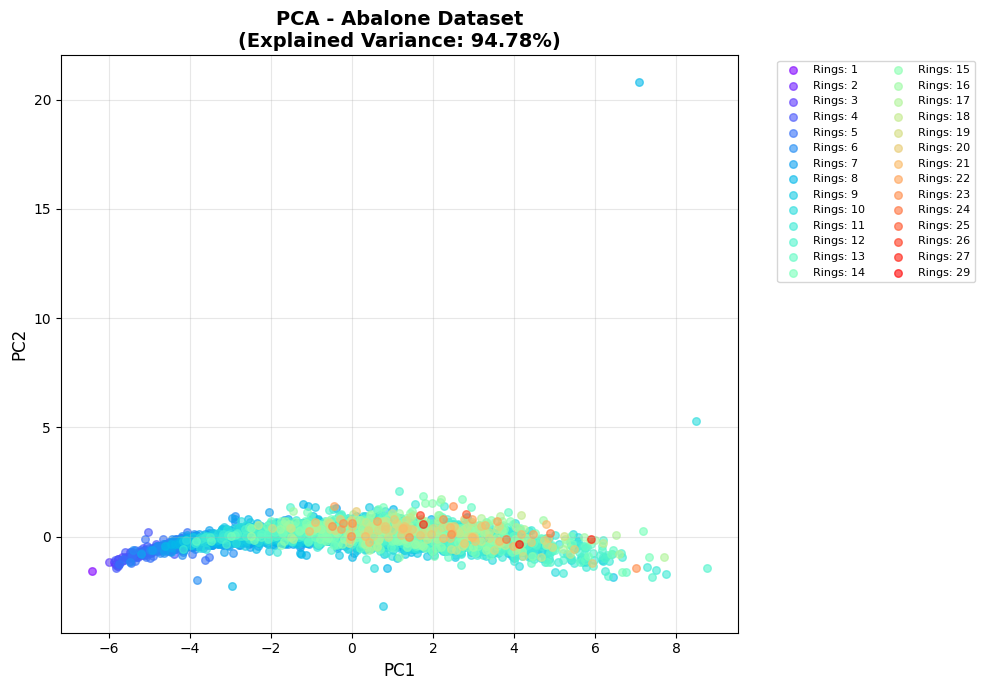


THỐNG KÊ DỮ LIỆU

Số mẫu: 4177
Số đặc trưng liên tục: 7
Số nhãn (Rings) khác nhau: 28
Phạm vi Rings: 1 - 29

Phân bố Rings:
  Rings 1: 1 mẫu (0.0%)
  Rings 2: 1 mẫu (0.0%)
  Rings 3: 15 mẫu (0.4%)
  Rings 4: 57 mẫu (1.4%)
  Rings 5: 115 mẫu (2.8%)
  Rings 6: 259 mẫu (6.2%)
  Rings 7: 391 mẫu (9.4%)
  Rings 8: 568 mẫu (13.6%)
  Rings 9: 689 mẫu (16.5%)
  Rings 10: 634 mẫu (15.2%)
  Rings 11: 487 mẫu (11.7%)
  Rings 12: 267 mẫu (6.4%)
  Rings 13: 203 mẫu (4.9%)
  Rings 14: 126 mẫu (3.0%)
  Rings 15: 103 mẫu (2.5%)
  Rings 16: 67 mẫu (1.6%)
  Rings 17: 58 mẫu (1.4%)
  Rings 18: 42 mẫu (1.0%)
  Rings 19: 32 mẫu (0.8%)
  Rings 20: 26 mẫu (0.6%)
  Rings 21: 14 mẫu (0.3%)
  Rings 22: 6 mẫu (0.1%)
  Rings 23: 9 mẫu (0.2%)
  Rings 24: 2 mẫu (0.0%)
  Rings 25: 1 mẫu (0.0%)
  Rings 26: 1 mẫu (0.0%)
  Rings 27: 2 mẫu (0.0%)
  Rings 29: 1 mẫu (0.0%)

PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)
PC1 variance: 0.9079
PC2 variance: 0.0399

Các đặc trưng quan trọng nhất cho PC1:
  Whole weight: 0.3907
  Diameter:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("abalone_data.csv")
target = df['Rings']
df = df.drop('Rings', axis=1)

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nCác cột:\n{df.columns.tolist()}")

# Chọn chỉ các cột liên tục (bỏ cột 'Sex' là categorical)
continuous_columns = [col for col in df.columns if col != 'Sex']
X = df[continuous_columns].values

print(f"\nSố đặc trưng liên tục: {len(continuous_columns)}")
print(f"Đặc trưng: {continuous_columns}")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thu giảm chiều với PCA
print("\nÁp dụng PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Tổng variance được giải thích: {sum(pca.explained_variance_ratio_):.4f}")

# Chuyển target thành số nếu cần
if isinstance(target, pd.Series):
    y = target.astype(int).values
else:
    y = np.array(target, dtype=int)

# Tạo colormap cho các nhãn
unique_labels = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Vẽ biểu đồ - CHỈ 1 BIỂU ĐỒ
plt.figure(figsize=(10, 7))

for label in unique_labels:
    mask = y == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[color_map[label]], label=f'Rings: {label}',
               alpha=0.6, s=30)

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title(f'PCA - Abalone Dataset\n(Explained Variance: {sum(pca.explained_variance_ratio_):.2%})', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=8)

plt.tight_layout()
plt.show()

# In thống kê
print("\n" + "="*60)
print("THỐNG KÊ DỮ LIỆU")
print("="*60)
print(f"\nSố mẫu: {len(X)}")
print(f"Số đặc trưng liên tục: {len(continuous_columns)}")
print(f"Số nhãn (Rings) khác nhau: {len(unique_labels)}")
print(f"Phạm vi Rings: {y.min()} - {y.max()}")
print(f"\nPhân bố Rings:")
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Rings {label}: {count} mẫu ({count/len(y)*100:.1f}%)")

# Thống kê theo phương pháp
print("\n" + "="*60)
print("PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)")
print("="*60)
print(f"PC1 variance: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2 variance: {pca.explained_variance_ratio_[1]:.4f}")
print(f"\nCác đặc trưng quan trọng nhất cho PC1:")
pc1_importance = np.abs(pca.components_[0])
important_features_pc1 = sorted(zip(continuous_columns, pc1_importance), 
                                key=lambda x: x[1], reverse=True)
for feat, imp in important_features_pc1[:3]:
    print(f"  {feat}: {imp:.4f}")

print(f"\nCác đặc trưng quan trọng nhất cho PC2:")
pc2_importance = np.abs(pca.components_[1])
important_features_pc2 = sorted(zip(continuous_columns, pc2_importance), 
                                key=lambda x: x[1], reverse=True)
for feat, imp in important_features_pc2[:3]:
    print(f"  {feat}: {imp:.4f}")


Tìm tham số tối ưu cho KNN...


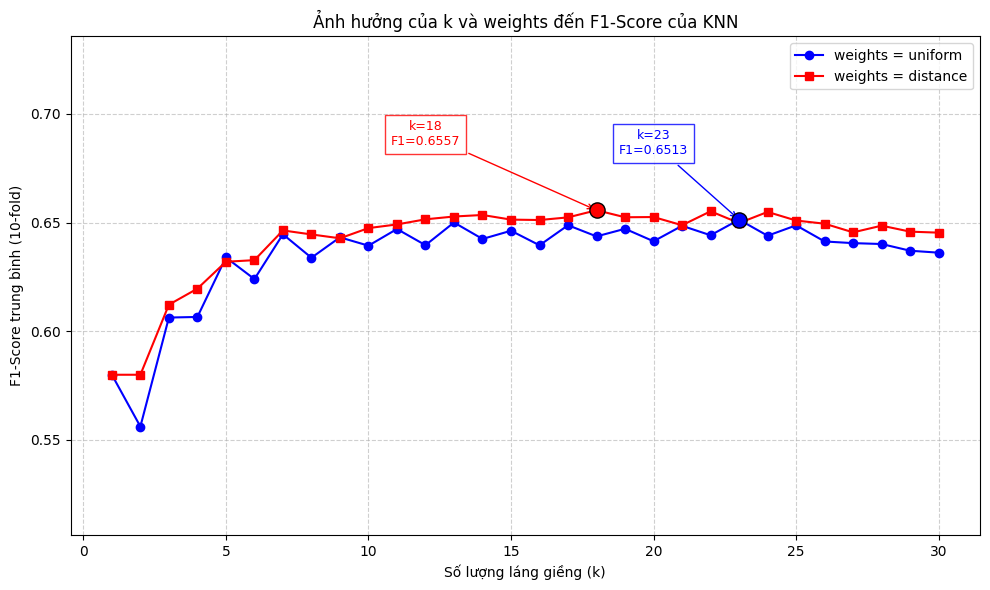

Weights = uniform =>Best k = 23, F1 = 0.6513
Weights = distance =>Best k = 18, F1 = 0.6557

Tìm tham số tối ưu cho RandomForest...


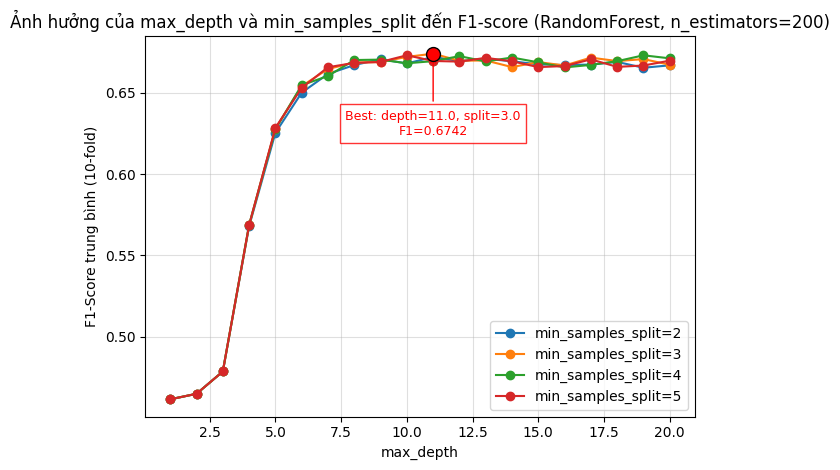


Best Parameters: max_depth=11.0, min_samples_split=3.0, F1=0.6742

Tìm tham số tối ưu cho SVM...


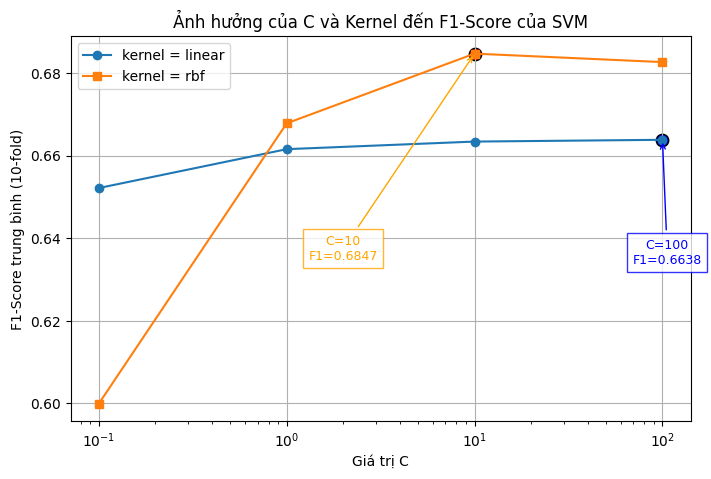

Kernel = linear → Best C = 100, F1 = 0.6638
Kernel = rbf → Best C = 10, F1 = 0.6847

Đang tinh chỉnh tham số cho mô hình KNN ...

Đang tinh chỉnh tham số cho mô hình RandomForest ...

Đang tinh chỉnh tham số cho mô hình SVM ...

Kết quả so sánh hiệu năng:
          Model                                        Best Params  F1-Score
0           SVM                       {'C': 10.0, 'kernel': 'rbf'}  0.684729
1  RandomForest  {'n_estimators': 200, 'max_depth': 11, 'min_sa...  0.674188
2           KNN         {'n_neighbors': 18, 'weights': 'distance'}  0.655659


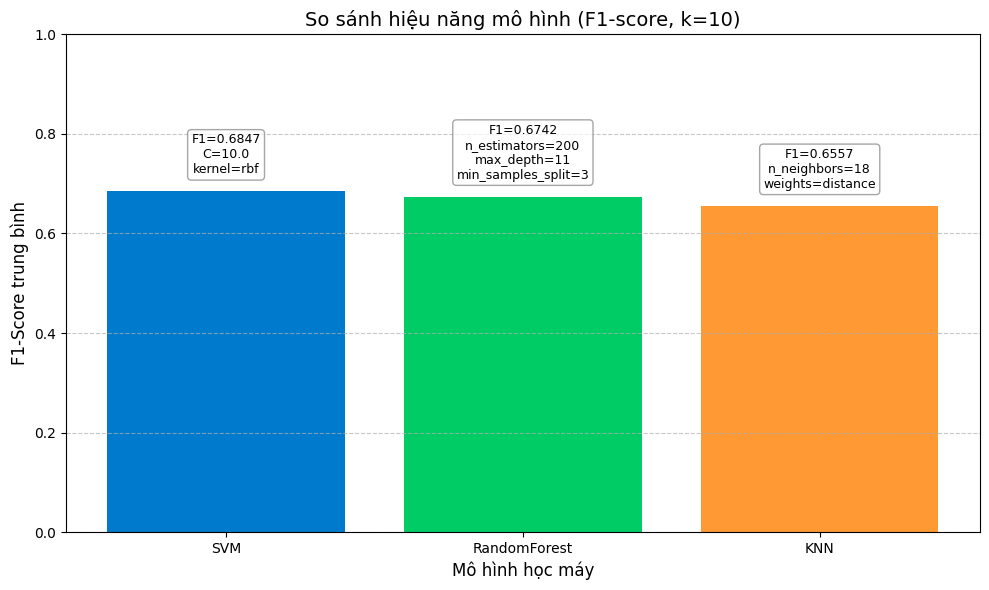

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# --- 1. Đọc dữ liệu ---
df = pd.read_csv("abalone_data.csv")

# --- 2. Mã hóa cột phân loại ---
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# --- 3. Chia dữ liệu ---
X = df.drop('Rings', axis=1)
y = df['Rings']

# Chuyển bài toán Regression -> Classification (3 nhóm tuổi)
y = pd.cut(y, bins=[0, 8, 11, 30], labels=[0, 1, 2])
y = y.astype(int)

# --- 4. Chuẩn hóa ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 5. 10-fold Cross Validation ---
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# =========================================================
# Vẽ biểu đồ ảnh hưởng của k đến F1-score (KNN)
# =========================================================
print("\nTìm tham số tối ưu cho KNN...")

neighbors = list(range(1, 31))
f1_uniform = []
f1_distance = []

# Tính F1-score trung bình cho mỗi k và mỗi loại weight
for k in neighbors:
    knn_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_d = KNeighborsClassifier(n_neighbors=k, weights='distance')
    f1_u = cross_val_score(knn_u, X_scaled, y, cv=kf, scoring=make_scorer(f1_score, average='macro')).mean()
    f1_d = cross_val_score(knn_d, X_scaled, y, cv=kf, scoring=make_scorer(f1_score, average='macro')).mean()

    f1_uniform.append(f1_u)
    f1_distance.append(f1_d)

# Chuyển sang numpy array để xử lý dễ hơn
f1_uniform = np.array(f1_uniform)
f1_distance = np.array(f1_distance)

# Tìm best k và giá trị F1 tương ứng
best_idx_uniform = int(np.argmax(f1_uniform))
best_k_uniform = neighbors[best_idx_uniform]
best_f1_uniform = float(f1_uniform[best_idx_uniform])

best_idx_distance = int(np.argmax(f1_distance))
best_k_distance = neighbors[best_idx_distance]
best_f1_distance = float(f1_distance[best_idx_distance])

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(10,6))
plt.plot(neighbors, f1_uniform, marker='o', label='weights = uniform', color='blue')
plt.plot(neighbors, f1_distance, marker='s', label='weights = distance', color='red')

# Đánh dấu điểm tốt nhất (dùng edgecolors để tránh warning)
plt.scatter([best_k_uniform], [best_f1_uniform], color='blue', edgecolors='black', s=120, zorder=5)
plt.scatter([best_k_distance], [best_f1_distance], color='red', edgecolors='black', s=120, zorder=5)

plt.annotate(
    f"k={best_k_uniform}\nF1={best_f1_uniform:.4f}",
    xy=(best_k_uniform, best_f1_uniform),
    xytext=(best_k_uniform-3, best_f1_uniform+0.03),
    arrowprops=dict(arrowstyle="->", color='blue'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue'),
    color='blue',
    fontsize=9,
    ha='center'
)

plt.annotate(
    f"k={best_k_distance}\nF1={best_f1_distance:.4f}",
    xy=(best_k_distance, best_f1_distance),
    xytext=(best_k_distance-6, best_f1_distance+0.03),
    arrowprops=dict(arrowstyle="->", color='red'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'),
    color='red',
    fontsize=9,
    ha='center'
)

plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('F1-Score trung bình (10-fold)')
plt.title('Ảnh hưởng của k và weights đến F1-Score của KNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

ymin = min(f1_uniform.min(), f1_distance.min()) - 0.05
ymax = max(f1_uniform.max(), f1_distance.max()) + 0.08
plt.ylim(max(0, ymin), min(1.0, ymax))

plt.tight_layout()
plt.show()

print(f"Weights = uniform =>Best k = {best_k_uniform}, F1 = {best_f1_uniform:.4f}")
print(f"Weights = distance =>Best k = {best_k_distance}, F1 = {best_f1_distance:.4f}")


#==========================================================
#Vẽ biểu đồ tham số mô hình Random Forest
# =========================================================
print("\nTìm tham số tối ưu cho RandomForest...")

max_depths = range(1, 21)
splits = [2, 3, 4, 5]
results = []

for split in splits:
    f1_scores = []
    for depth in max_depths:
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=depth,
            min_samples_split=split,
            random_state=42
        )
        f1 = cross_val_score(
            rf, X_scaled, y,
            cv=kf,
            scoring=make_scorer(f1_score, average='macro'),
            n_jobs=-1
        ).mean()
        f1_scores.append(f1)
        results.append({"max_depth": depth, "min_samples_split": split, "f1_score": f1})
    plt.plot(max_depths, f1_scores, marker='o', label=f"min_samples_split={split}")

# Tìm điểm tốt nhất trong toàn bộ kết quả
results_df = pd.DataFrame(results)
best_row = results_df.loc[results_df['f1_score'].idxmax()]

# Vẽ dấu chấm cho điểm tốt nhất
plt.scatter(best_row['max_depth'], best_row['f1_score'], color='red', s=100, edgecolor='black', zorder=5)
plt.annotate(
    f"Best: depth={best_row['max_depth']}, split={best_row['min_samples_split']}\nF1={best_row['f1_score']:.4f}",
    xy=(best_row['max_depth'], best_row['f1_score']),
    xytext=(best_row['max_depth'], best_row['f1_score'] - 0.05),
    arrowprops=dict(arrowstyle="->", color='red'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'),
    color='red',
    fontsize=9,
    ha='center'
)

# Cấu hình biểu đồ
plt.figure(1)
plt.title("Ảnh hưởng của max_depth và min_samples_split đến F1-score (RandomForest, n_estimators=200)")
plt.xlabel("max_depth")
plt.ylabel("F1-Score trung bình (10-fold)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print(f"\nBest Parameters: max_depth={best_row['max_depth']}, min_samples_split={best_row['min_samples_split']}, F1={best_row['f1_score']:.4f}")


#==========================================================
#Vẽ biểu đồ tham số mô hình SVM
# =========================================================
print("\nTìm tham số tối ưu cho SVM...")

C_values = [0.1, 1, 10, 100]
kernels = ["linear", "rbf"]
results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    for C in C_values:
        model = SVC(C=C, kernel=kernel, random_state=42)
        f1 = cross_val_score(
            model, X_scaled, y, cv=kf,
            scoring=make_scorer(f1_score, average='macro')
        ).mean()
        results[kernel].append(f1)

# Tìm best C cho từng kernel
best_C_linear = C_values[np.argmax(results['linear'])]
best_f1_linear = max(results['linear'])

best_C_rbf = C_values[np.argmax(results['rbf'])]
best_f1_rbf = max(results['rbf'])


# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(8,5))
plt.plot(C_values, results['linear'], marker='o', label='kernel = linear')
plt.plot(C_values, results['rbf'], marker='s', label='kernel = rbf')

# Đánh dấu best point
plt.scatter(best_C_linear, best_f1_linear, color='blue', s=80, edgecolor='black')
plt.scatter(best_C_rbf, best_f1_rbf, color='red', s=80, edgecolor='black')

# Ghi chú
plt.annotate(
    f"C={best_C_linear}\nF1={best_f1_linear:.4f}",
    xy=(best_C_linear, best_f1_linear),
    xytext=(best_C_linear+6, best_f1_linear-0.03),
    arrowprops=dict(arrowstyle="->", color='blue'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue'),
    color='blue',
    fontsize=9,
    ha='center'
)


plt.annotate(
    f"C={best_C_rbf}\nF1={best_f1_rbf:.4f}",
    xy=(best_C_rbf, best_f1_rbf),
    xytext=(best_C_rbf-8, best_f1_rbf-0.05),
    arrowprops=dict(arrowstyle="->", color='orange'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='orange'),
    color='orange',
    fontsize=9,
    ha='center'
)

plt.xlabel("Giá trị C")
plt.ylabel("F1-Score trung bình (10-fold)")
plt.title("Ảnh hưởng của C và Kernel đến F1-Score của SVM")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

print(f"Kernel = linear → Best C = {best_C_linear}, F1 = {best_f1_linear:.4f}")
print(f"Kernel = rbf → Best C = {best_C_rbf}, F1 = {best_f1_rbf:.4f}")


# =========================================================
# Huấn luyện + tinh chỉnh các mô hình
# =========================================================
best_knn_weights = "distance" if best_f1_distance > best_f1_uniform else "uniform"
best_knn_k = best_k_distance if best_knn_weights == "distance" else best_k_uniform

# Chọn SVM kernel tốt nhất
if best_f1_linear > best_f1_rbf:
    best_svm_kernel = "linear"
    best_svm_c = best_C_linear
    best_svm_f1 = best_f1_linear
else:
    best_svm_kernel = "rbf"
    best_svm_c = best_C_rbf
    best_svm_f1 = best_f1_rbf

# Tạo dict lưu tham số tối ưu
best_params = {
    "KNN": {
        "n_neighbors": best_knn_k,
        "weights": best_knn_weights
    },
    "RandomForest": {
        "n_estimators": 200,
        "max_depth": int(best_row["max_depth"]),
        "min_samples_split": int(best_row["min_samples_split"])
    },
    "SVM": {
        "C": float(best_svm_c),
        "kernel": best_svm_kernel
    }
}

# Danh sách mô hình
models = {
    "KNN": KNeighborsClassifier(**best_params["KNN"]),
    "RandomForest": RandomForestClassifier(random_state=42, **best_params["RandomForest"]),
    "SVM": SVC(random_state=42, **best_params["SVM"])
}

# --- Đánh giá hiệu năng bằng cross-validation ---
results = []
for name, model in models.items():
    print(f"\nĐang tinh chỉnh tham số cho mô hình {name} ...")
    f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring=make_scorer(f1_score, average="macro")).mean()
    results.append({
        "Model": name,
        "Best Params": best_params[name],
        "F1-Score": f1
    })


# =========================================================
# Hiển thị bảng kết quả
# =========================================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
print("\nKết quả so sánh hiệu năng:")
print(results_df)

# =========================================================
# Vẽ biểu đồ so sánh hiệu năng các mô hình
# =========================================================
plt.figure(figsize=(10,6))
bars = plt.bar(results_df["Model"], results_df["F1-Score"], color=['#007acc','#00cc66','#ff9933'])
plt.title("So sánh hiệu năng mô hình (F1-score, k=10)", fontsize=14)
plt.xlabel("Mô hình học máy", fontsize=12)
plt.ylabel("F1-Score trung bình", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị F1-score và tham số trên từng cột
for bar, (_, row) in zip(bars, results_df.iterrows()):
    yval = bar.get_height()
    params_text = "\n".join([f"{k}={v}" for k, v in row["Best Params"].items()])
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.03,
        f"F1={yval:.4f}\n{params_text}",
        ha='center', va='bottom', fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
plt.show()


🔹 K-Means tốt nhất: k = 4
    ARI = 0.0717, NMI = 0.1667

🔹 DBSCAN tốt nhất: eps = 0.49, min_samples = 8
    ARI = 0.0480, NMI = 0.1031

=== Kết quả cuối cùng ===
K-Means ARI: 0.07166597256262472
K-Means NMI: 0.16665774673461162
DBSCAN ARI: 0.047988158427652854
DBSCAN NMI: 0.10312322973528149


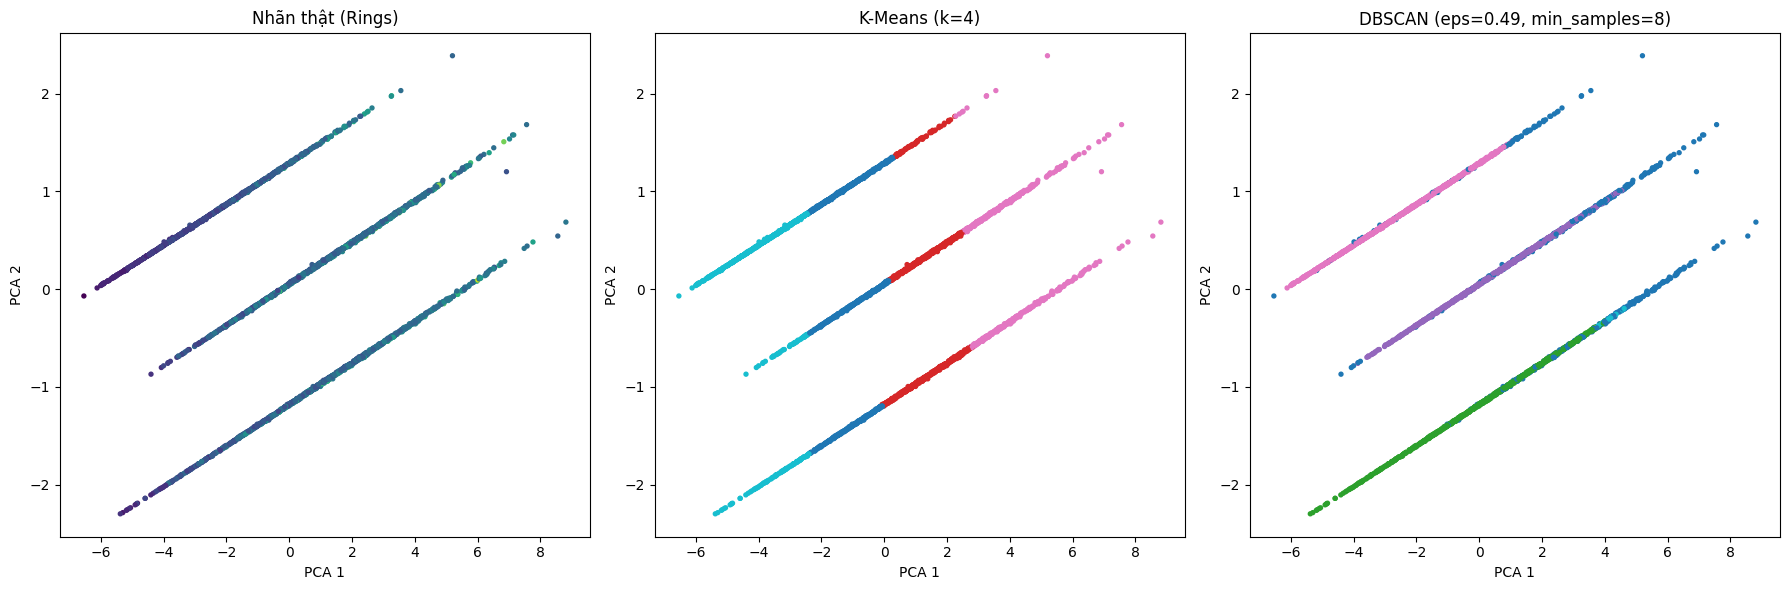

In [5]:
# === 0. Import thư viện ===
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# === 1. Đọc dữ liệu ===
df = pd.read_csv("abalone_data.csv")

# === 2. Loại bỏ cột nhãn (Rings) ===
X = df.drop(columns=['Rings'])
y_true = df['Rings']

# Nếu có cột 'Sex' dạng chữ, mã hóa thành số
if 'Sex' in X.columns:
    X['Sex'] = X['Sex'].astype('category').cat.codes

# === 3. Chuẩn hóa dữ liệu ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. TÌM THÔNG SỐ TỐI ƯU CHO K-MEANS & DBSCAN ===
best_k, best_k_ari, best_k_nmi = None, -1, -1
for k in range(2, 15):  # Thử từ 2 đến 14 cụm
    model = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = model.fit_predict(X_scaled)
    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    if ari > best_k_ari:
        best_k, best_k_ari, best_k_nmi = k, ari, nmi

print(f"🔹 K-Means tốt nhất: k = {best_k}")
print(f"    ARI = {best_k_ari:.4f}, NMI = {best_k_nmi:.4f}")

# Dải giá trị cần thử cho DBSCAN
best_eps, best_min, best_db_ari, best_db_nmi = None, None, -1, -1
eps_values = np.linspace(0.3, 2.0, 10)
min_samples_values = [3, 4, 5, 6, 8]

for eps in eps_values:
    for min_s in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_s)
        labels = model.fit_predict(X_scaled)
        if len(set(labels)) <= 1:
            continue
        ari = adjusted_rand_score(y_true, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
        if ari > best_db_ari:
            best_eps, best_min, best_db_ari, best_db_nmi = eps, min_s, ari, nmi

print(f"\n🔹 DBSCAN tốt nhất: eps = {best_eps:.2f}, min_samples = {best_min}")
print(f"    ARI = {best_db_ari:.4f}, NMI = {best_db_nmi:.4f}")

# === 5. CHẠY LẠI VỚI THÔNG SỐ TỐI ƯU ===
kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=best_eps, min_samples=best_min)
dbscan_labels = dbscan.fit_predict(X_scaled)

# === 6. ĐÁNH GIÁ ===
print("\n=== Kết quả cuối cùng ===")
print("K-Means ARI:", adjusted_rand_score(y_true, kmeans_labels))
print("K-Means NMI:", normalized_mutual_info_score(y_true, kmeans_labels))
print("DBSCAN ARI:", adjusted_rand_score(y_true, dbscan_labels))
print("DBSCAN NMI:", normalized_mutual_info_score(y_true, dbscan_labels))

# === 7. GIẢM CHIỀU BẰNG PCA & TRỰC QUAN HÓA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=8)
axes[0].set_title("Nhãn thật (Rings)")

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', s=8)
axes[1].set_title(f"K-Means (k={best_k})")

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', s=8)
axes[2].set_title(f"DBSCAN (eps={best_eps:.2f}, min_samples={best_min})")

for ax in axes:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

